In [1]:
import lichess

In [4]:
import pandas as pd

df = pd.read_csv("lichess_db_puzzle.csv")

    # Wyświetlenie kilku pierwszych wierszy
print("Pierwsze 10 wierszy pliku CSV:")
print(df.head(10))

    # Informacje o kolumnach
print("\nKolumny w pliku:")
print(df.columns)

    # Informacje o danych
print("\nInformacje o danych:")
print(df.info())


Pierwsze 10 wierszy pliku CSV:
  PuzzleId                                                FEN  \
0    00008  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   
1    0000D  5rk1/1p3ppp/pq3b2/8/8/1P1Q1N2/P4PPP/3R2K1 w - ...   
2    0008Q       8/4R3/1p2P3/p4r2/P6p/1P3Pk1/4K3/8 w - - 1 64   
3    0009B  r2qr1k1/b1p2ppp/pp4n1/P1P1p3/4P1n1/B2P2Pb/3NBP...   
4    000VW  r4r2/1p3pkp/p5p1/3R1N1Q/3P4/8/P1q2P2/3R2K1 b -...   
5    000Vc             8/8/4k1p1/2KpP2p/5PP1/8/8/8 w - - 0 53   
6    000Zo  4r3/1k6/pp3r2/1b2P2p/3R1p2/P1R2P2/1P4PP/6K1 w ...   
7    000aY  r4rk1/pp3ppp/2n1b3/q1pp2B1/8/P1Q2NP1/1PP1PP1P/...   
8    000hf  r1bqk2r/pp1nbNp1/2p1p2p/8/2BP4/1PN3P1/P3QP1P/3...   
9    000lC  3r3r/pQNk1ppp/1qnb1n2/1B6/8/8/PPP3PP/3R1R1K w ...   

                           Moves  Rating  RatingDeviation  Popularity  \
0  f2g3 e6e7 b2b1 b3c1 b1c1 h6c1    1838               75          95   
1            d3d6 f8d8 d6d8 f6d8    1455               74          96   
2            e7f7 f5e5 e2f1 e5e6  

In [6]:
print(df.head(1))


  PuzzleId                                                FEN  \
0    00008  r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - ...   

                           Moves  Rating  RatingDeviation  Popularity  \
0  f2g3 e6e7 b2b1 b3c1 b1c1 h6c1    1838               75          95   

   NbPlays                                 Themes  \
0     7002  crushing hangingPiece long middlegame   

                                 GameUrl OpeningTags  
0  https://lichess.org/787zsVup/black#48         NaN  


In [9]:
df['Moves'][0]

'f2g3 e6e7 b2b1 b3c1 b1c1 h6c1'

In [10]:
df['FEN'][0]

'r6k/pp2r2p/4Rp1Q/3p4/8/1N1P2R1/PqP2bPP/7K b - - 0 24'

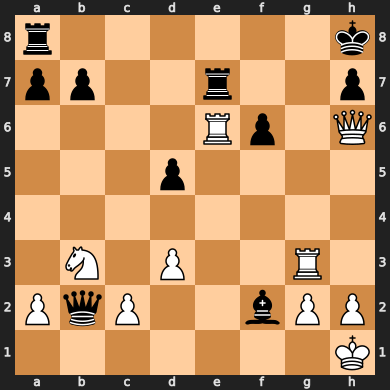

In [11]:
import chess
import chess.svg
from IPython.display import display, SVG

def rysuj_szachownice(fen):
    # Utworzenie obiektu szachownicy na podstawie FEN
    board = chess.Board(fen)
    
    # Generowanie obrazu SVG
    szachownica_svg = chess.svg.board(board)
    
    # Wyświetlenie szachownicy w Jupyter Notebook
    display(SVG(szachownica_svg))
    
    # Opcjonalnie: zapis do pliku
    with open("szachownica.svg", "w") as file:
        file.write(szachownica_svg)

# Przykład użycia
fen = df['FEN'][0]
rysuj_szachownice(fen)

pu0gPsxm#45
45
[Move.from_uci('e2e4'), Move.from_uci('e7e5'), Move.from_uci('g1f3'), Move.from_uci('b8c6'), Move.from_uci('f1c4'), Move.from_uci('f8c5'), Move.from_uci('e1g1'), Move.from_uci('h7h6'), Move.from_uci('c2c3'), Move.from_uci('a7a6'), Move.from_uci('b2b4'), Move.from_uci('c5a7'), Move.from_uci('b4b5'), Move.from_uci('c6a5'), Move.from_uci('d1a4'), Move.from_uci('a5c4'), Move.from_uci('a4c4'), Move.from_uci('a6b5'), Move.from_uci('c4b5'), Move.from_uci('c7c6'), Move.from_uci('b5e5'), Move.from_uci('e8f8'), Move.from_uci('c1a3'), Move.from_uci('g8e7'), Move.from_uci('f3h4'), Move.from_uci('f8g8'), Move.from_uci('a3e7'), Move.from_uci('d8e8'), Move.from_uci('h4f5'), Move.from_uci('f7f6'), Move.from_uci('e7f6'), Move.from_uci('e8e5'), Move.from_uci('f6e5'), Move.from_uci('d7d5'), Move.from_uci('f5e7'), Move.from_uci('g8f7'), Move.from_uci('e7c8'), Move.from_uci('a8c8'), Move.from_uci('d2d4'), Move.from_uci('d5e4'), Move.from_uci('f1e1'), Move.from_uci('c6c5'), Move.from_uci('e1e

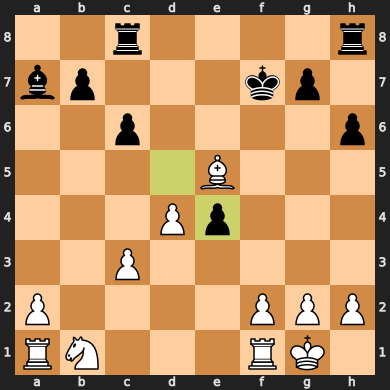

In [9]:
import io
import requests
import chess.pgn
import sqlite3

conn = sqlite3.connect("Lichess_Puzzle.db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM puzzles ORDER BY RANDOM() LIMIT 1;")
puzzle = cursor.fetchone()
conn.close()

game_url = puzzle[8]  # np. "https://lichess.org/2clM1WU0/black#54"

game_id = game_url.split("lichess.org/")[1].split("/")[0]  
print(game_id)
halfmove_str = game_url.split('#')[-1]  # "54"
halfmove_target = int(halfmove_str)
print(halfmove_target)

halfmove_start = max(0, halfmove_target - 5) #5 to blind_moves

pgn_url = f"https://lichess.org/game/export/{game_id}.pgn"
r = requests.get(pgn_url)
pgn_text = r.text  # cały PGN

pgn_io = io.StringIO(pgn_text)
game = chess.pgn.read_game(pgn_io)
board = game.board()

moves_list = list(game.mainline_moves())  # wszystkie ruchy w partii (po kolei)
print(moves_list)
        
for i in range(0, halfmove_start):
    board.push(moves_list[i])  # odtwarzamy partie do momentu # (halfmove_start)
board

In [10]:
import io
import requests
import chess.pgn
import sqlite3

conn = sqlite3.connect("Lichess_Puzzle.db")
cursor = conn.cursor()
cursor.execute("SELECT * FROM puzzles ORDER BY RANDOM() LIMIT 1;")
puzzle = cursor.fetchone()
conn.close()

In [ ]:
puzzle[2]

In [2]:
print(game_url)

https://lichess.org/xlb4ES98/black#44


Odtworzenie szachownicy ze ślepymi ruchami.

In [ ]:
        halfmove_str = game_url.split('#')[-1]  # "54"
        halfmove_target = int(halfmove_str)

        # 3) Oblicz, do którego półruchu chcemy się cofnąć:
        #    Np. 54 - 4 = 50
        halfmove_start = max(0, halfmove_target - blind_moves)

        # 4) Pobierz cały PGN z Lichess
        pgn_url = f"https://lichess.org/game/export/{game_id}.pgn"
        r = requests.get(pgn_url)
        pgn_text = r.text  # cały PGN

        # 5) Wczytaj PGN do obiektu python-chess
        pgn_io = io.StringIO(pgn_text)
        game = chess.pgn.read_game(pgn_io)
        board = game.board()

        # 6) Przesuń się do pozycji po halfmove_start
        moves_list = list(game.mainline_moves())  # wszystkie ruchy w partii (po kolei)
        # Pamiętaj, moves_list ma tyle elementów, ile było półruchów w grze
        # Indeksujemy od 0, więc: moves_list[0] to pierwszy ruch białych (półruch #1).
        
        for i in range(0, halfmove_start):
            board.push(moves_list[i])  # odtwarzamy partie do momentu # (halfmove_start)


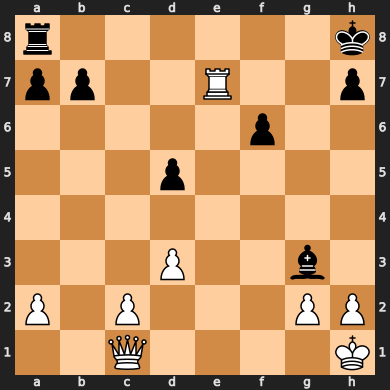

In [12]:
import chess
import chess.svg
from IPython.display import display, SVG

def narysuj_po_ruchach(fen, moves):
    # Utworzenie obiektu szachownicy na podstawie FEN
    board = chess.Board(fen)
    
    # Wykonywanie ruchów zapisanych w notacji UCI
    for move in moves.split():
        try:
            board.push(chess.Move.from_uci(move))
        except ValueError:
            print(f"Błąd: Niepoprawny ruch {move}")
            return
    
    # Generowanie obrazu szachownicy
    szachownica_svg = chess.svg.board(board)
    
    # Wyświetlenie szachownicy w Jupyter Notebook
    display(SVG(szachownica_svg))
    
    # Opcjonalnie: zapis do pliku
    with open("szachownica_po_ruchach.svg", "w") as file:
        file.write(szachownica_svg)

# Początkowy FEN
fen = df['FEN'][0]

# Sekwencja ruchów w notacji UCI
moves = "f2g3 e6e7 b2b1 b3c1 b1c1 h6c1"

# Wywołanie funkcji
narysuj_po_ruchach(fen, moves)


In [15]:
import requests

def pobierz_gre(game_id):
    # URL API Lichess
    url = f"https://lichess.org/game/export/{game_id}"
    
    # Nagłówki API (opcjonalnie dodaj token, jeśli API wymaga autoryzacji)
    headers = {
        "Accept": "application/json"  # Pobierz grę w formacie JSON
    }
    
    try:
        # Wykonanie żądania GET
        response = requests.get(url, headers=headers)
        
        # Sprawdzenie statusu odpowiedzi
        if response.status_code == 200:
            gra = response.json()  # Wczytanie odpowiedzi w formacie JSON
            print("Gra została pobrana!")
            return gra
        else:
            print(f"Błąd: Nie udało się pobrać gry. Kod odpowiedzi: {response.status_code}")
    except Exception as e:
        print(f"Wystąpił błąd: {e}")
        return None




In [16]:
# ID gry z Lichess
game_id = "787zsVup"

# Pobranie gry
gra = pobierz_gre(game_id)

# Wyświetlenie podstawowych informacji o grze


Gra została pobrana!
Gracz białych: Brak danych
Gracz czarnych: Brak danych
PGN gry:
Brak danych


In [17]:
gra

{'id': '787zsVup',
 'rated': True,
 'variant': 'standard',
 'speed': 'blitz',
 'perf': 'blitz',
 'createdAt': 1615054270332,
 'lastMoveAt': 1615054532788,
 'status': 'mate',
 'source': 'arena',
 'players': {'white': {'user': {'name': 'nelubin', 'id': 'nelubin'},
   'rating': 1638,
   'ratingDiff': 9,
   'analysis': {'inaccuracy': 2, 'mistake': 0, 'blunder': 3, 'acpl': 60}},
  'black': {'user': {'name': 'aanreitaylor', 'id': 'aanreitaylor'},
   'rating': 1851,
   'ratingDiff': -9,
   'analysis': {'inaccuracy': 4, 'mistake': 0, 'blunder': 4, 'acpl': 102}}},
 'winner': 'white',
 'opening': {'eco': 'B10', 'name': 'Caro-Kann Defense', 'ply': 2},
 'moves': 'e4 c6 f4 d5 exd5 cxd5 Nf3 Nc6 d3 Nf6 Be2 Qc7 O-O e5 fxe5 Nxe5 Nxe5 Qxe5 Bf4 Qxb2 Nd2 Bc5+ Kh1 O-O Nb3 Bb6 Bd6 Rd8 Be7 Rd7 Bxf6 gxf6 Rf3 Rc7 Rg3+ Kh8 Bh5 Bf5 Bxf7 Rxf7 Qh5 Be6 Re1 Re7 Qh6 Bf2 Rxe6 Bxg3 Rxe7 Qb1+ Nc1 Rg8 Qxh7#',
 'clocks': [18003,
  18003,
  17891,
  17651,
  17707,
  17643,
  17611,
  17579,
  17379,
  17459,
  17275,
  17

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407884 entries, 0 to 4407883
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   PuzzleId         object
 1   FEN              object
 2   Moves            object
 3   Rating           int64 
 4   RatingDeviation  int64 
 5   Popularity       int64 
 6   NbPlays          int64 
 7   Themes           object
 8   GameUrl          object
 9   OpeningTags      object
dtypes: int64(4), object(6)
memory usage: 336.3+ MB


Tworzenie bazy danych rozwiązanych zadań

In [20]:
import sqlite3
def utworz_baze_danych(nazwa_pliku):
    """Tworzy bazę danych SQLite i tabelę zadania."""
    conn = sqlite3.connect(nazwa_pliku)  # Połączenie z bazą danych
    cursor = conn.cursor()

    # Tworzenie tabeli
    cursor.execute('''
        CREATE TABLE IF NOT EXISTS zadania (
            id INTEGER PRIMARY KEY,
            nazwa TEXT NOT NULL,
            data_wykonania TEXT,
            status TEXT,
            uwagi TEXT
        )
    ''')

    conn.commit()  # Zatwierdzenie zmian
    conn.close()   # Zamknięcie połączenia

# Wywołanie funkcji, aby utworzyć bazę danych
utworz_baze_danych("zadania.db")


Pobieranie listyy zadań

In [21]:
def pobierz_zadania(nazwa_pliku):
    """Pobiera wszystkie zadania z bazy danych."""
    conn = sqlite3.connect(nazwa_pliku)
    cursor = conn.cursor()

    cursor.execute('SELECT * FROM zadania')
    zadania = cursor.fetchall()

    conn.close()
    return zadania

# Przykład pobrania zadań
zadania = pobierz_zadania("zadania.db")
for zadanie in zadania:
    print(zadanie)


In [22]:
import random

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407884 entries, 0 to 4407883
Data columns (total 10 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   PuzzleId         object
 1   FEN              object
 2   Moves            object
 3   Rating           int64 
 4   RatingDeviation  int64 
 5   Popularity       int64 
 6   NbPlays          int64 
 7   Themes           object
 8   GameUrl          object
 9   OpeningTags      object
dtypes: int64(4), object(6)
memory usage: 336.3+ MB


In [26]:
import sqlite3
import pandas as pd

# 1. Łączymy się (lub tworzymy) bazę SQLite
conn = sqlite3.connect("Lichess_Puzzle.db")
cursor = conn.cursor()

# 2. Usunięcie tabeli, jeśli istnieje (opcjonalne, jeśli chcesz mieć "świeżą" tabelę)
cursor.execute("DROP TABLE IF EXISTS puzzles;")

# 3. Tworzymy tabelę z kolumnami odpowiadającymi CSV
#    - PuzzleId jako PRIMARY KEY (zakładamy, że jest unikalny)
cursor.execute("""
    CREATE TABLE puzzles (
        PuzzleId TEXT PRIMARY KEY,
        FEN TEXT,
        Moves TEXT,
        Rating INTEGER,
        RatingDeviation INTEGER,
        Popularity INTEGER,
        NbPlays INTEGER,
        Themes TEXT,
        GameUrl TEXT,
        OpeningTags TEXT
    );
""")
conn.commit()

# 4. Wczytanie pliku CSV w partiach i zapisywanie do SQL
chunksize = 100_000  # można dostosować do ilości RAM i wydajności
csv_file = "lichess_db_puzzle.csv"

reader = pd.read_csv(csv_file, chunksize=chunksize)

for i, chunk in enumerate(reader):
    # if_exists='append' – dopisujemy do istniejącej już tabeli
    chunk.to_sql("puzzles", conn, if_exists="append", index=False)
    print(f"Przetworzono chunk nr {i+1}")

# 5. (Opcjonalnie) można dodatkowo założyć indeksy na inne kolumny
#    np. jeśli często filtrowana jest kolumna Rating:
# cursor.execute("CREATE INDEX IF NOT EXISTS idx_rating ON puzzles (Rating);")
# conn.commit()

# 6. Zamknięcie połączenia
conn.close()

print("Baza danych Lichess_Puzzle.db została utworzona/uzupełniona.")


Przetworzono chunk nr 1
Przetworzono chunk nr 2
Przetworzono chunk nr 3
Przetworzono chunk nr 4
Przetworzono chunk nr 5
Przetworzono chunk nr 6
Przetworzono chunk nr 7
Przetworzono chunk nr 8
Przetworzono chunk nr 9
Przetworzono chunk nr 10
Przetworzono chunk nr 11
Przetworzono chunk nr 12
Przetworzono chunk nr 13
Przetworzono chunk nr 14
Przetworzono chunk nr 15
Przetworzono chunk nr 16
Przetworzono chunk nr 17
Przetworzono chunk nr 18
Przetworzono chunk nr 19
Przetworzono chunk nr 20
Przetworzono chunk nr 21
Przetworzono chunk nr 22
Przetworzono chunk nr 23
Przetworzono chunk nr 24
Przetworzono chunk nr 25
Przetworzono chunk nr 26
Przetworzono chunk nr 27
Przetworzono chunk nr 28
Przetworzono chunk nr 29
Przetworzono chunk nr 30
Przetworzono chunk nr 31
Przetworzono chunk nr 32
Przetworzono chunk nr 33
Przetworzono chunk nr 34
Przetworzono chunk nr 35
Przetworzono chunk nr 36
Przetworzono chunk nr 37
Przetworzono chunk nr 38
Przetworzono chunk nr 39
Przetworzono chunk nr 40
Przetworz

Wybieramy najtrudniejsze puzzle

In [1]:
import sqlite3

conn = sqlite3.connect("Lichess_Puzzle.db")
cursor = conn.cursor()

cursor.execute("SELECT * FROM puzzles WHERE Rating > 3200")
puzzles = cursor.fetchall()  # Pobiera wszystkie wyniki zapytania

for puzzle in puzzles:
    print(puzzle)

conn.close()


('FrUmI', '5rk1/p2P1pp1/1p2p1qp/3bP3/1P2r3/P4Q2/5RPP/2B2RK1 b - - 0 27', 'e4e5 f3c3 e5e4 f2f7', 3224, 127, 92, 1255, 'crushing discoveredAttack middlegame short', 'https://lichess.org/2clM1WU0/black#54', None)
('JXEHg', '6k1/pp4p1/4bq2/2bp1r2/8/1BP5/PP2QpPP/R4R1K w - - 2 24', 'e2b5 f6e5 b3c2 c5d6 b5e8 f5f8', 3206, 125, 92, 934, 'crushing defensiveMove long middlegame quietMove', 'https://lichess.org/vrSQqDid#47', None)
('KEIfF', '5qk1/3Qb1p1/1p2P2p/p1r5/8/1P3P2/5P1P/R3R1K1 w - - 5 30', 'e1c1 c5g5 g1f1 f8f3 d7c8 e7f8 c1c3 f3g2 f1e2 g5f5 a1f1 f5e5', 3203, 128, 92, 1351, 'crushing endgame veryLong', 'https://lichess.org/G6doLr6g#59', None)
('Ktw4A', '8/8/8/7r/2P3k1/3K3p/7R/8 w - - 2 66', 'd3e3 g4g3 h2h1 g3g2 h1c1 h5h4 c1c2 g2g3 c4c5 h3h2 c2c1 g3g2', 3241, 152, 90, 2287, 'advancedPawn crushing defensiveMove endgame rookEndgame veryLong', 'https://lichess.org/8UDCStgD#131', None)
('MsIsv', '5rk1/2Q3p1/R3pq1p/1B1pnb2/8/1PP1P3/5PP1/5RK1 w - - 3 28', 'a6d6 f6g6 f2f4 f5h3 f1f2 e5f3', 3289, 119,

In [2]:
import sqlite3

conn = sqlite3.connect("Lichess_Puzzle.db")
cursor = conn.cursor()

# Losowy rekord
cursor.execute("SELECT * FROM puzzles ORDER BY RANDOM() LIMIT 1;")
puzzle = cursor.fetchone()

print(puzzle)
conn.close()


('ArniD', '5k2/pb4pp/3r4/8/2Q1qN2/1P2p3/P3R1PP/6K1 w - - 0 33', 'c4e4 d6d1 e2e1 d1e1', 1145, 77, 88, 255, 'endgame mate mateIn2 short', 'https://lichess.org/W1NNbhji#65', None)


In [3]:
puzzle[3]

1145

Tworzenie bazy danych rozwiuązywanych zadań dla danego użytkownika.

In [28]:
import sqlite3h

# Połączenie (lub utworzenie) bazy danych
conn = sqlite3.connect("User_Puzzle.db")
cursor = conn.cursor()

# Usunięcie starej tabeli (opcjonalne - jeśli chcesz 'czystą' tabelę za każdym razem)
cursor.execute("DROP TABLE IF EXISTS user_puzzles;")

# Stworzenie nowej tabeli user_puzzles
# W tym przykładzie klucz główny to autoincrement (ID).
# Dzięki temu możemy mieć wiele wpisów dla tego samego PuzzleId.
cursor.execute("""
    CREATE TABLE user_puzzles (
        PuzzleId TEXT PRIMARY KEY,
        FEN TEXT,
        Moves TEXT,
        Rating INTEGER,
        RatingDeviation INTEGER,
        Popularity INTEGER,
        NbPlays INTEGER,
        Themes TEXT,
        GameUrl TEXT,
        OpeningTags TEXT,
        SolveDate TEXT,
        SolveTime REAL,
        Result INTEGER,
        BlindMoves INTEGER
    );
""")

conn.commit()
conn.close()

print("Baza danych 'User_Puzzle.db' i tabela 'user_puzzles' zostały utworzone.")


Baza danych 'User_Puzzle.db' i tabela 'user_puzzles' zostały utworzone.


Zapytania do bazy danych

In [29]:
import sqlite3

In [4]:
conn = sqlite3.connect("User_Puzzle.db")
cursor = conn.cursor()

cursor.execute("SELECT * FROM user_puzzles")

# Pobranie wszystkich wyników
rows = cursor.fetchall()

# Wyświetlenie wyników
for row in rows:
    print(row)



conn.commit()
conn.close()


(1, 'JfPrr', '2025-01-16T16:34:09.680Z', 47.565, 0, 0, 100, 98, -2)
(2, 'SBxsl', '2025-01-16T16:35:00.131Z', 34.004, 1, 2, 100, 132, 32)
(3, 'nSf00', '2025-01-16T16:40:12.863Z', 22.213, 1, 2, 100, 131, 31)
(4, 'TZKaU', '2025-01-16T16:41:17.896Z', 54.818, 0, 0, 131, 128, -3)
(5, None, '2025-01-17T15:08:59.993Z', 7.976, 0, 2, 128, 125, -3)
(6, 'OFDY2', '2025-01-17T15:15:03.134Z', 3.634, 0, 0, 125, 122, -3)
(7, '3Yixc', '2025-01-17T15:23:35.479Z', 4.63, 0, 0, 122, 118, -4)
(8, 'ERn7D', '2025-01-17T15:25:11.240Z', 2.458, 0, 0, 118, 116, -2)
(9, 'AGdZl', '2025-01-17T21:17:31.196Z', 160.742, 0, 0, 116, 114, -2)
(10, 'kn3Vl', '2025-01-20T10:05:05.734Z', 360.639, 0, 0, 114, 112, -2)
(11, '4hOFf', '2025-01-20T10:40:53.424Z', 127.941, 1, 2, 112, 150, 38)
(12, 'VVa0r', '2025-01-27T12:46:18.380Z', 145.204, 1, 2, 150, 173, 23)
(13, 'Zi5U0', '2025-01-27T12:50:50.929Z', 91.687, 1, 2, 173, 196, 23)
(14, '6lGLG', '2025-01-27T13:05:34.276Z', 20.88, 1, 2, 196, 214, 18)
(15, 'mnjLi', '2025-01-27T13:08:41.

In [1]:
import chess

In [9]:
import requests

def pobierz_pgn():
    pgn_url = "https://lichess.org/game/export/787zsVup.pgn?moves=true"
    try:
        resp = requests.get(pgn_url)
        resp.raise_for_status()
        return resp.text  # Zwraca zawartość pliku PGN jako tekst
    except requests.RequestException as e:
        return f"Błąd pobierania PGN: {e}"

# Wywołanie funkcji
wynik = pobierz_pgn()
print(wynik)


[Event "Hourly SuperBlitz Arena"]
[Site "https://lichess.org/787zsVup"]
[Date "2021.03.06"]
[White "nelubin"]
[Black "aanreitaylor"]
[Result "1-0"]
[UTCDate "2021.03.06"]
[UTCTime "18:11:10"]
[WhiteElo "1638"]
[BlackElo "1851"]
[WhiteRatingDiff "+9"]
[BlackRatingDiff "-9"]
[Variant "Standard"]
[TimeControl "180+0"]
[ECO "B10"]
[Opening "Caro-Kann Defense"]
[Termination "Normal"]

1. e4 { [%eval 0.25] [%clk 0:03:00] } 1... c6 { [%eval 0.13] [%clk 0:03:00] } 2. f4 { [%eval -0.16] [%clk 0:02:59] } 2... d5 { [%eval 0.0] [%clk 0:02:57] } 3. exd5 { [%eval -0.51] [%clk 0:02:57] } 3... cxd5 { [%eval -0.47] [%clk 0:02:56] } 4. Nf3 { [%eval -0.71] [%clk 0:02:56] } 4... Nc6 { [%eval -0.55] [%clk 0:02:56] } 5. d3 { [%eval -0.9] [%clk 0:02:54] } 5... Nf6 { [%eval -0.87] [%clk 0:02:55] } 6. Be2 { [%eval -0.62] [%clk 0:02:53] } 6... Qc7 { [%eval -0.63] [%clk 0:02:54] } 7. O-O { [%eval -0.81] [%clk 0:02:52] } 7... e5 { [%eval 0.91] [%clk 0:02:52] } 8. fxe5 { [%eval 0.93] [%clk 0:02:49] } 8... Nxe5 { [

In [3]:
import sqlite3

# Połączenie (lub utworzenie) bazy danych
conn = sqlite3.connect("User_Puzzle.db")
cursor = conn.cursor()


# Stworzenie nowej tabeli user_puzzles
# W tym przykładzie klucz główny to autoincrement (ID).
# Dzięki temu możemy mieć wiele wpisów dla tego samego PuzzleId.
cursor.execute("""SELECT * FROM user_puzzles""")
puzzles = cursor.fetchall()  # Pobiera wszystkie wyniki zapytania

for puzzle in puzzles:
    print(puzzle)

conn.commit()
conn.close()

(1, '', '2025-01-15T23:54:59.447Z', 49.674, 1, 2, 100, 500, 500)
(2, '', '2025-01-16T00:10:11.396Z', 38.481, 1, 2, 100, 500, 500)
